### OCR (광학문자판독)

- 이미지로 된 문자를 텍스트로 변환하는 작업
- Tessaract API, 구글 OCR API, Naver OCR API 등을 사용
- Tessaract API 다운로드 : https://github.com/UB-Mannheim/tesseract/wiki
    - tesseract-ocr-w64-setup-v5.0.0-alpha.20201127.exe
    - 설치시에 Additional language data 체크

In [1]:
# 파이썬용 Tessaract API 설치
!pip install pytesseract

In [2]:
# 설치 위치를 지정
import pytesseract

pytesseract.pytesseract.tesseract_cmd = r"C:\Program Files\Tesseract-OCR\tesseract.exe"

In [3]:
import cv2
import matplotlib.pyplot as plt

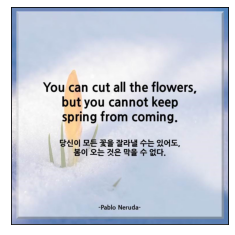

In [4]:
# 이미지 불러오기
img = cv2.imread("./image/text.jpg")
img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)

plt.xticks([])
plt.yticks([])
plt.imshow(img)

In [5]:
# 이미지에서 문자열 추출
# lang = "eng" : 언어를 영어로 설정 (한글 : kor)
result = pytesseract.image_to_string(img, lang = "eng") # 영어만 추출

print(result)

You can cut all the flowers

but you cannot keep ‘
spring from coming

Gilo] SE Be Wears +e Vols,
BO] SE 22 te + Ch.

-Pablo Neruda- :



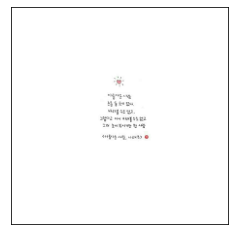

In [6]:
# 이미지 불러오기
img = cv2.imread("./image/story.png")
img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)

plt.xticks([])
plt.yticks([])
plt.imshow(img)

In [7]:
result = pytesseract.image_to_string(img, lang = "kor") # 한글만 추출

print(result)

- tesseract API 사용할 때는 이진 이미지로 변경한 후에 사용하는 것을 권장
    - 글자가 흐릿할 경우 인식이 잘 안됨

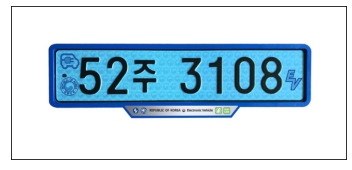

In [8]:
# 이미지 불러오기
img = cv2.imread("./image/car.jpg")
img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)

plt.xticks([])
plt.yticks([])
plt.imshow(img, cmap="gray")

In [9]:
result = pytesseract.image_to_string(img, lang = "kor") # 한글만 추출

print(result)

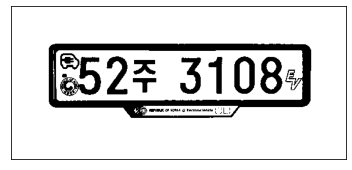

In [10]:
# 이미지 불러오기
img = cv2.imread("./image/car.jpg")
img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)

# 흑백 이미지로 변경
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 이진 이미지로 변경
_, binary = cv2.threshold(gray, 150, 255, cv2.THRESH_BINARY)

plt.xticks([])
plt.yticks([])
plt.imshow(binary, cmap = "gray")

In [11]:
result = pytesseract.image_to_string(binary, lang = "kor") # 한글만 추출

print(result)

### harrcascade 알고리즘을 이용해서 얼굴과 눈 영역 추출

In [15]:
# 알고리즘 등록
face_cascade = cv2.CascadeClassifier("haarcascade_frontalface_default.xml")
eye_cascade = cv2.CascadeClassifier("haarcascade_eye.xml")

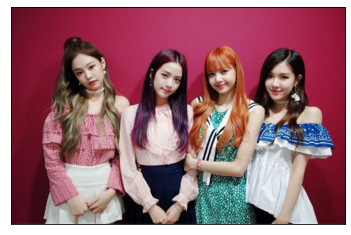

In [50]:
img = cv2.imread("./image/face.jpg")
img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

plt.xticks([])
plt.yticks([])
plt.imshow(img)

In [51]:
# 얼굴 영역 검철
# scaleFactor : 확대비율만큼 확대해가면서 검색 -> 작은 값일수록 자세히 찾지만, 연산량이 증가
# minNeighbors : 후보 사각형이 유지해야 하는 최소 이웃의 수 -> 값이 클수록 덜 감지됨, 정확도는 증가
# 반환값 : 얼굴들의 좌상단좌표와 가로세로 크기가 튜플 형태로 반환
faces = face_cascade.detectMultiScale(gray, scaleFactor = 1.1,
                                       minNeighbors = 3)

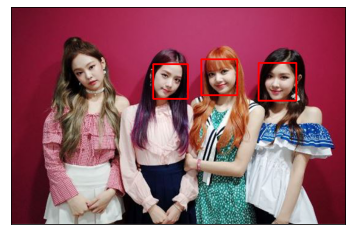

In [52]:
# 검색된 얼굴 영역을 표시
for (x, y, w, h) in faces:
    cv2.rectangle(img, (x, y), (x + w, y + h), (255, 0, 0), 2)
    
    # 얼굴 영역 내에서 눈 영역을 검출
    # 얼굴 ROI 자르기
    roi_gray = gray[y:y+h, x:x+w]
    roi_img = gray[y:y+h, x:x+w]
    
    # 눈 영역 검출
    eyes = eye_cascade.detectMultiScale(roi_gray, 1.2, 3)
    
    # 검출된 눈 영역을 표시
    for (ex, ey, ew, eh) in eyes:
        cv2.rectangle(roi_img, (ex, ey), (ex+ew, ey+eh), (0, 255, 0), 2)
    
    
plt.xticks([])
plt.yticks([])
plt.imshow(img)

### 동영상에서 얼굴과 눈 검출하기

In [53]:
# try ~ except : try문의 명령에서 에러가 발생하면 except문의 명령이 실행
try:
    cap = cv2.VideoCapture("./image/face.mp4")
except:
    print("비디오 캡쳐 실패")
    
while True:
    ret, frame = cap.read()
    
    if not ret:
        print("프레임 읽기 실패")
        cap.release()
        cv2.destroyAllWindows()
        break
        
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    faces = face_cascade.detectMultiScale(gray, scaleFactor = 1.1,
                                       minNeighbors = 3)
    
    # 검색된 얼굴 영역을 표시
    for (x, y, w, h) in faces:
        cv2.rectangle(frame, (x, y), (x + w, y + h), (255, 0, 0), 2)
    
        # 얼굴 영역 내에서 눈 영역을 검출
        # 얼굴 ROI 자르기
        roi_gray = gray[y:y+h, x:x+w]
        roi_img = frame[y:y+h, x:x+w]
    
        # 눈 영역 검출
        eyes = eye_cascade.detectMultiScale(roi_gray, 1.2, 3)
    
        # 검출된 눈 영역을 표시
        for (ex, ey, ew, eh) in eyes:
            cv2.rectangle(roi_img, (ex, ey), (ex+ew, ey+eh), (0, 255, 0), 2)
            
    cv2.imshow("face detect", frame)
    
    k = cv2.waitKey(33)
    
    if k == 49:
        cap.release()
        cv2.destroyAllWindows()
        break